In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [20]:
import os

In [21]:
cwd = os.getcwd()

In [2]:
df_master = pd.read_csv("train.csv")
df_train = df_master

In [3]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# How many unique variables does each column contain?
pd.options.display.max_rows = 100
df_train.nunique().sort_values(ascending = False)

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
Neighborhood       25
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
Exterior2nd        16
MSSubClass         15
Exterior1st        15
MoSold             12
TotRmsAbvGrd       12
OverallQual        10
OverallCond         9
Condition1          9
SaleType            9
BedroomAbvGr        8
PoolArea            8
Condition2          8
HouseStyle          8
RoofMatl            8
Functional          7
Heating             6
BsmtFinType1        6
GarageType          6
SaleCondition       6
RoofStyle           6
Foundation          6
BsmtFinTyp

<AxesSubplot:>

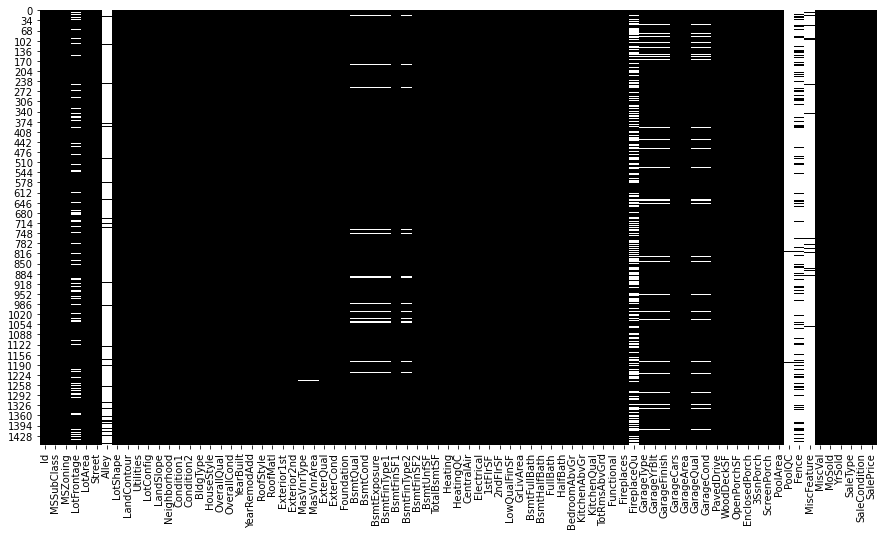

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train.isnull(), cbar = False, cmap="gray")

In [7]:
missing_val= pd.DataFrame(df_train.isnull().sum()[df_train.isnull().sum()!=0]\
                          .sort_values(ascending = False)).rename(columns = {0:'num_miss'})
missing_val['missing_perc'] = (missing_val/df_train.shape[0]*100).round(1)
missing_val = missing_val.query('missing_perc > 40')

In [8]:
missing_val

,num_miss,missing_perc
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3


In [9]:
drop_cols = missing_val.index.to_list()
drop_cols

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [10]:
df_train.drop(['Id'],axis=1,inplace=True)
df_train.drop(columns=drop_cols,axis=1,inplace=True)

In [11]:
df_train.shape

(1460, 75)

In [12]:
num_cols = df_train.select_dtypes(include=['number'])
cat_cols = df_train.select_dtypes(include=['object'])

print(f'The dataset contains {len(num_cols.columns.tolist())} numerical columns \
and {len(cat_cols.columns.tolist())} categorical columns')

The dataset contains 37 numerical columns and 38 categorical columns


In [13]:
num_cols

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [14]:
num_cols_train = num_cols[['LotFrontage','YearBuilt','OverallCond','YrSold' ]]                

In [15]:
num_cols_train

,LotFrontage,YearBuilt,OverallCond,YrSold
0,65.0,2003,5,2008
1,80.0,1976,8,2007
2,68.0,2001,5,2008
3,60.0,1915,5,2006
4,84.0,2000,5,2008
...,...,...,...,...
1455,62.0,1999,5,2007
1456,85.0,1978,6,2010
1457,66.0,1941,9,2010
1458,68.0,1950,6,2010


In [16]:
cat_cols_missing = cat_cols.columns[cat_cols.isnull().any()]
cat_cols_missing

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')